In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy import displacy
from spacy import tokenizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel, TfidfModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
default_plot_colour = "#00bfbf"

In [3]:
data = pd.read_csv("fake_news_data.csv")

In [4]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            198 non-null    object
 1   text             198 non-null    object
 2   date             198 non-null    object
 3   fake_or_factual  198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


Text(0.5, 1.0, 'Count of Article Classification')

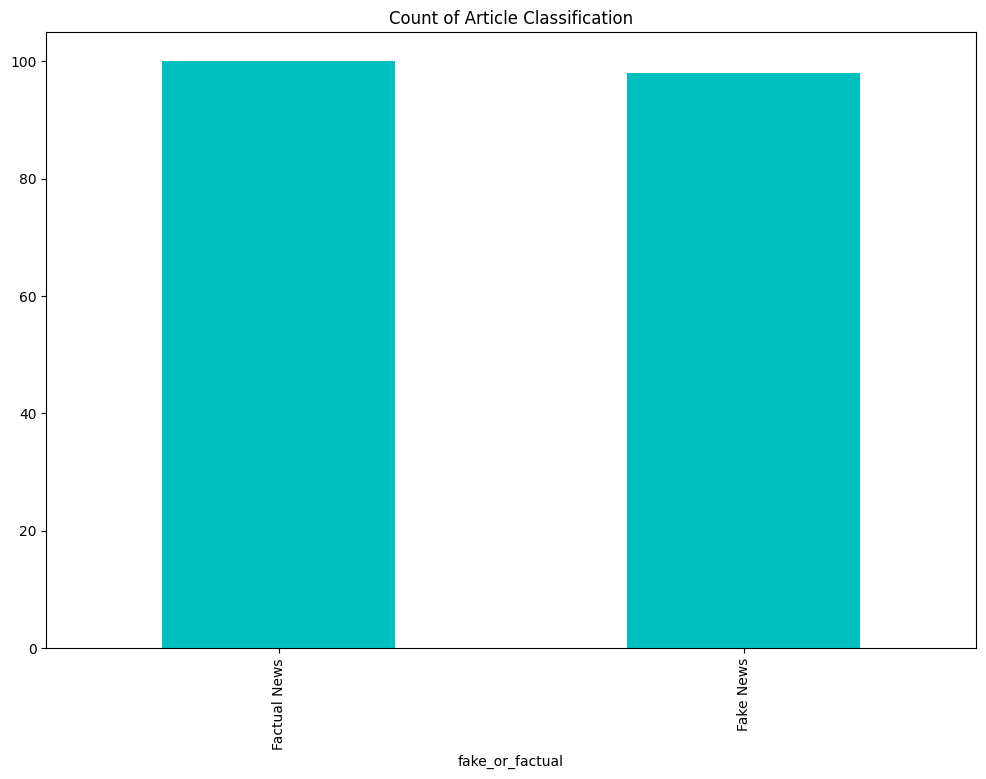

In [6]:
data["fake_or_factual"].value_counts().plot(kind="bar", color = default_plot_colour)
plt.title("Count of Article Classification")

# POS Tagging

In [7]:
nlp = spacy.load("en_core_web_sm")

In [8]:
fake_news = data[data["fake_or_factual"] == "Fake News"]
factual_news = data[data["fake_or_factual"] == "Factual News"]

In [9]:
fake_news


,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
5,Maxine Waters Makes Teens Chant ‘Impeach 45′ a...,Shame on Teen Vogue! Maxine Waters was a guest...,"Dec 10, 2017",Fake News
6,Jay Carney Let It Slip That He Knows Who Obam...,Former White House Press Secretary in the Obam...,"February 10, 2016",Fake News
...,...,...,...,...
191,Terrorist Jon Ritzheimer Uses Sobbing Daughte...,"Jon Ritzheimer, infamous hater of Muslims and ...","January 26, 2016",Fake News
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News


In [10]:
factual_news

,title,text,date,fake_or_factual
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News
7,"Trump threat fires up U.S. climate activists, ...",(Reuters) - Seattle financial worker Harrison ...,"November 11, 2016",Factual News
9,China labels Trump call 'petty action' by Taiw...,BEIJING (Reuters) - U.S. President-elect Donal...,"December 3, 2016",Factual News
11,Kerry says can't comment on content of Clinton...,QUEBEC CITY (Reuters) - U.S. Secretary of Stat...,"January 29, 2016",Factual News
...,...,...,...,...
184,White House not aware of other nations plannin...,WASHINGTON (Reuters) - The White House said on...,"December 7, 2017",Factual News
185,Four killed as militants attack airport securi...,SRINAGAR (Reuters) - Indian police on Tuesday ...,"October 3, 2017",Factual News
188,Chinese aircraft drill again in Western Pacific,BEIJING (Reuters) - Chinese military aircraft ...,"December 21, 2017",Factual News
192,"France close to Qatar military, transport cont...",PARIS (Reuters) - France is close to finalizin...,"December 4, 2017",Factual News


In [11]:
fake_spacydocs = list(nlp.pipe(fake_news["text"]))
factual_spacydocs = list(nlp.pipe(factual_news["text"]))

In [12]:
fake_spacydocs

[There are two small problems with your analogy Susan  Jesus was NOT a Muslim and Joseph traveled to Bethlehem with Mary. For anyone who s not paying attention there don t appear to be many female refugees accompanying male Muslim  refugees  to Greece.Susan Sarandon spent the Christmas holiday on the Greek island of Lesbos assisting international organizations with the mounting Syrian refugee crisis   a crisis, she says, that recalls the travails of Joseph and Mary on their way to the Inn in Bethlehem.In a column for the Huffington Post and RYOT, the 69-year-old Oscar-winning actress described meeting a 16-year-old girl who had apparently given birth shortly before arriving on the island. I smile and approach her, but without a translator, our conversation is basic-friendly,  Sarandon wrote of her experience.  She takes the bundle next to her and opens it to me. Inside is a perfect, rosy, newborn. The actress continues:She is beaming, so proud. How did this young girl, just having give

In [13]:
def extract_token_tags(doc:spacy.tokens.doc.Doc):
    return([(i.text, i.ent_type_, i.pos_) for i in doc])

In [14]:
fake_tagdf = []
columns = ["tokens", "ner_tag", "pos_tag"]

In [15]:
for ix,doc in enumerate(fake_spacydocs):
    extract = extract_token_tags(doc)
    tags = pd.DataFrame(extract)
    tags.columns = columns
    fake_tagdf.append(tags)

In [16]:
fake_tagdf

[        tokens   ner_tag pos_tag
 0        There              PRON
 1          are              VERB
 2          two  CARDINAL     NUM
 3        small               ADJ
 4     problems              NOUN
 ..         ...       ...     ...
 388          .             PUNCT
 389        Via             PROPN
 390          :             PUNCT
 391  Breitbart       ORG   PROPN
 392       News       ORG   PROPN
 
 [393 rows x 3 columns],
       tokens ner_tag pos_tag
 0     Buried            VERB
 1         in             ADP
 2      Trump     ORG   PROPN
 3          s            PART
 4    bonkers            NOUN
 ..       ...     ...     ...
 530      Win     ORG   PROPN
 531  McNamee     ORG   PROPN
 532        /     ORG     SYM
 533    Getty     ORG   PROPN
 534   Images     ORG   PROPN
 
 [535 rows x 3 columns],
        tokens  ner_tag pos_tag
 0       Women             NOUN
 1        make             VERB
 2          up              ADP
 3        over  PERCENT     ADP
 4          50  PE

In [17]:
fake_tagdf = pd.concat(fake_tagdf)


In [24]:
fake_tagdf

,tokens,ner_tag,pos_tag
0,There,,PRON
1,are,,VERB
2,two,CARDINAL,NUM
3,small,,ADJ
4,problems,,NOUN
...,...,...,...
743,.,,PUNCT
744,Via,,PROPN
745,:,,PUNCT
746,Campus,PERSON,PROPN


In [25]:
factual_tagdf = []

for ix,doc in enumerate(factual_spacydocs):
    extract = extract_token_tags(doc)
    tags = pd.DataFrame(extract)
    tags.columns = columns
    factual_tagdf.append(tags)

In [26]:
factual_tagdf = pd.concat(factual_tagdf)

In [27]:
factual_tagdf

,tokens,ner_tag,pos_tag
0,WASHINGTON,GPE,PROPN
1,(,,PUNCT
2,Reuters,ORG,PROPN
3,),,PUNCT
4,-,,PUNCT
...,...,...,...
85,citing,,VERB
86,three,CARDINAL,NUM
87,unnamed,,ADJ
88,officials,,NOUN


In [39]:
pos_counts_fake = fake_tagdf.groupby(["tokens", "pos_tag"]).size().reset_index(
    name = "counts").sort_values(by="counts", ascending = False)

In [41]:
pos_counts_fake.head(15)

,tokens,pos_tag,counts
29,",",PUNCT,1908
7451,the,DET,1834
41,.,PUNCT,1530
5766,of,ADP,922
2665,and,CCONJ,875
2449,a,DET,805
0,,SPACE,795
7528,to,PART,767
4921,in,ADP,668
5099,is,AUX,419


In [43]:
pos_counts_factual = factual_tagdf.groupby(["tokens", "pos_tag"]).size().reset_index(
    name = "counts").sort_values(by="counts", ascending = False)
pos_counts_factual.head(15)

,tokens,pos_tag,counts
6145,the,DET,1903
14,",",PUNCT,1698
21,.,PUNCT,1382
4716,of,ADP,884
1898,a,DET,789
2093,and,CCONJ,757
4005,in,ADP,671
6205,to,PART,660
4743,on,ADP,482
5567,said,VERB,451


In [44]:
pos_counts_fake.groupby("pos_tag")["tokens"].count().sort_values(ascending = False).head(10)

pos_tag
NOUN     2586
VERB     1817
PROPN    1672
ADJ       882
ADV       413
NUM       221
PRON       96
ADP        89
AUX        62
SCONJ      51
Name: tokens, dtype: int64

In [45]:
pos_counts_factual.groupby("pos_tag")["tokens"].count().sort_values(ascending = False).head(10)

pos_tag
NOUN     2179
VERB     1539
PROPN    1379
ADJ       747
ADV       263
NUM       205
PRON       79
ADP        70
AUX        43
SCONJ      42
Name: tokens, dtype: int64

In [48]:
pos_counts_fake[pos_counts_fake.pos_tag == "NOUN"].head(15)

,tokens,pos_tag,counts
5981,people,NOUN,77
7349,t,NOUN,65
6216,president,NOUN,58
7960,women,NOUN,55
7516,time,NOUN,52
3138,campaign,NOUN,44
8011,year,NOUN,44
4581,government,NOUN,41
5213,law,NOUN,40
8013,years,NOUN,40


In [49]:
pos_counts_factual[pos_counts_factual.pos_tag == "NOUN"].head(15)

,tokens,pos_tag,counts
3738,government,NOUN,71
6618,year,NOUN,64
5901,state,NOUN,57
2360,bill,NOUN,55
1975,administration,NOUN,51
5066,president,NOUN,49
3277,election,NOUN,48
4919,people,NOUN,45
4786,order,NOUN,45
4259,law,NOUN,42


# Named Entity Recognition

In [50]:
top_entities_fake = fake_tagdf[fake_tagdf["ner_tag"] != ""].groupby(["tokens", "ner_tag"]).size().reset_index(
    name = "counts").sort_values(by = "counts", ascending = False)

In [51]:
top_entities_fake

,tokens,ner_tag,counts
1730,Trump,PERSON,154
1729,Trump,ORG,152
2129,the,ORG,121
592,Clinton,PERSON,118
718,Donald,PERSON,75
...,...,...,...
886,Hempstead,GPE,1
885,Helbig,PERSON,1
884,Hedge,PERSON,1
883,Heather,PERSON,1


In [52]:
top_entities_factual = factual_tagdf[factual_tagdf["ner_tag"] != ""].groupby(["tokens", "ner_tag"]).size().reset_index(
    name = "counts").sort_values(by = "counts", ascending = False)
top_entities_factual

,tokens,ner_tag,counts
1968,the,ORG,159
1633,U.S.,GPE,138
1373,Reuters,ORG,131
1615,Trump,PERSON,125
1614,Trump,ORG,124
...,...,...,...
804,German,NORP,1
803,Georgia,GPE,1
801,George,ORG,1
800,Geological,ORG,1


In [53]:
# create custom palette to ensure plots are consistent
ner_palette = {
    'ORG': sns.color_palette("Set2").as_hex()[0],
    'GPE': sns.color_palette("Set2").as_hex()[1],
    'NORP': sns.color_palette("Set2").as_hex()[2],
    'PERSON': sns.color_palette("Set2").as_hex()[3],
    'DATE': sns.color_palette("Set2").as_hex()[4],
    'CARDINAL': sns.color_palette("Set2").as_hex()[5],
    'PERCENT': sns.color_palette("Set2").as_hex()[6]
}

[Text(0.5, 1.0, 'Most Common Entities in Fake News')]

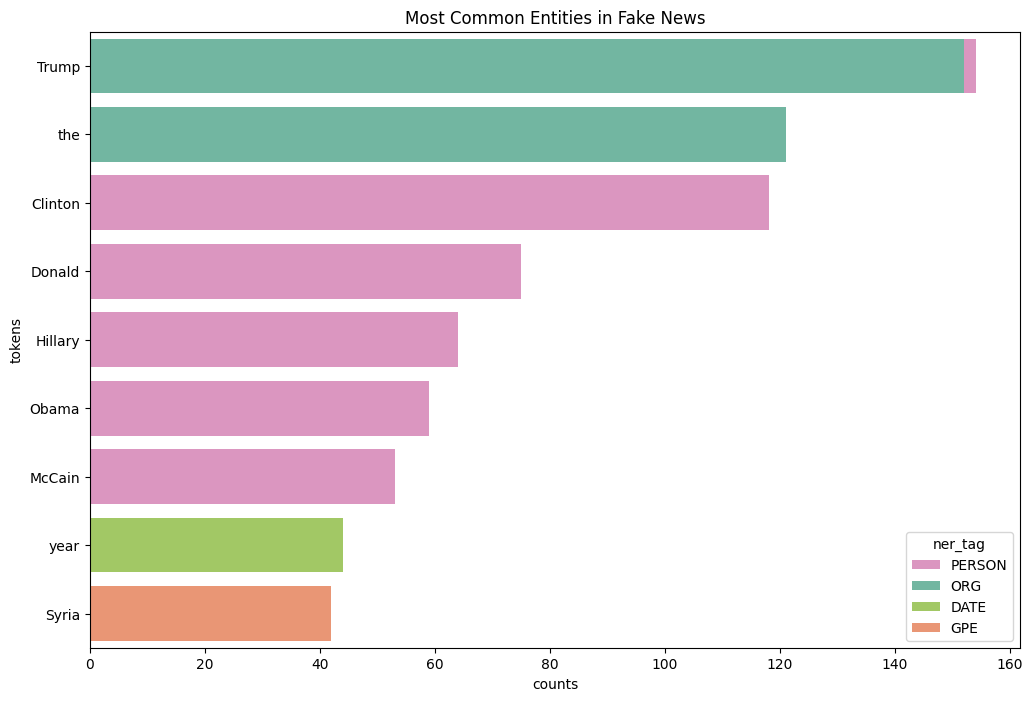

In [59]:
sns.barplot(
    x = 'counts',
    y = 'tokens',
    hue = 'ner_tag',
    palette = ner_palette,
    data = top_entities_fake[0:10],
    orient = 'h',
    dodge=False
).set(title='Most Common Entities in Fake News')

[Text(0.5, 1.0, 'Most Common Entities in Fake News')]

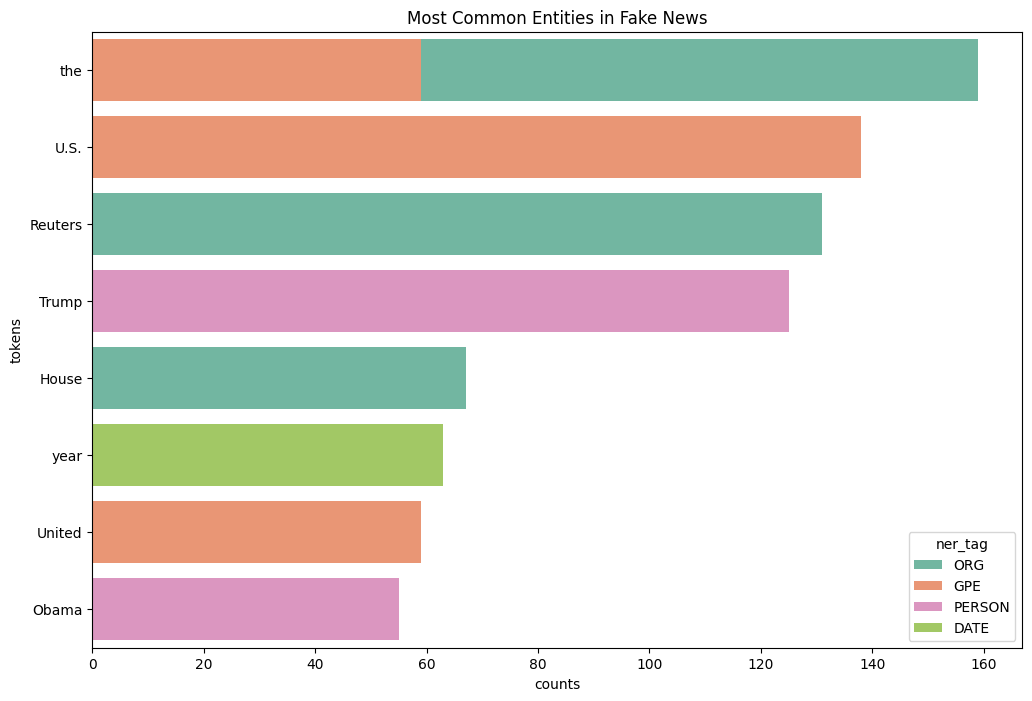

In [60]:
sns.barplot(
    x = 'counts',
    y = 'tokens',
    hue = 'ner_tag',
    palette = ner_palette,
    data = top_entities_factual[0:10],
    orient = 'h',
    dodge=False
).set(title='Most Common Entities in Fake News')

# Text Pre Processing

In [80]:
data.head()

,title,text,date,fake_or_factual,cleaned_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problems, analogy, susan, jesus, ..."
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,..."
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[women, make, 50, percent, country, grossly, u..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[us, defense, secretary, jim, mattis, said, mo..."
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, parties, rapidl..."


In [81]:
data["cleaned_text"] = data["text"].apply(lambda x: re.sub(r"^[^-]*-\s","", x))

In [82]:
data.head()

,title,text,date,fake_or_factual,cleaned_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,There are two small problems with your analogy...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,Buried in Trump s bonkers interview with New Y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"Women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,U.S. Defense Secretary Jim Mattis said on Mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,Northern Ireland s political parties are rapid...


In [83]:
data["cleaned_text"] = data["cleaned_text"].str.lower()

In [84]:
data["cleaned_text"] = data["cleaned_text"].apply(lambda x : re.sub(r"[^\w\s]", "", x))

In [85]:
data.head()

,title,text,date,fake_or_factual,cleaned_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,there are two small problems with your analogy...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried in trump s bonkers interview with new y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,women make up over 50 percent of this country ...
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,us defense secretary jim mattis said on monday...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,northern ireland s political parties are rapid...


In [86]:
en_stopwords = stopwords.words("english")

In [87]:
en_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [88]:
data["cleaned_text"] = data["cleaned_text"].apply(lambda x: " ".join([word for word in x.split() if word not in en_stopwords]))

In [89]:
data["cleaned_text"]

0      two small problems analogy susan jesus muslim ...
1      buried trump bonkers interview new york times ...
2      women make 50 percent country grossly underrep...
3      us defense secretary jim mattis said monday ru...
4      northern ireland political parties rapidly run...
                             ...                        
193    well take long look first beastiality marriage...
194    florida toxic dangerous stand ground gun cultu...
195    politico reports almost neckandneck race hilla...
196    former fbi director james comey requested addi...
197    small obscure community college disallowing la...
Name: cleaned_text, Length: 198, dtype: object

In [90]:
data["cleaned_text"] = data.apply(lambda x: word_tokenize(x["cleaned_text"]), axis=1)

In [91]:
data.head()

,title,text,date,fake_or_factual,cleaned_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problems, analogy, susan, jesus, ..."
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,..."
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[women, make, 50, percent, country, grossly, u..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[us, defense, secretary, jim, mattis, said, mo..."
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, parties, rapidl..."


In [92]:
lemmatizer = WordNetLemmatizer()
data["cleaned_text"] = data["cleaned_text"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [93]:
data.head(10)

,title,text,date,fake_or_factual,cleaned_text
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m..."
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,..."
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon..."
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,..."
5,Maxine Waters Makes Teens Chant ‘Impeach 45′ a...,Shame on Teen Vogue! Maxine Waters was a guest...,"Dec 10, 2017",Fake News,"[shame, teen, vogue, maxine, water, guest, tee..."
6,Jay Carney Let It Slip That He Knows Who Obam...,Former White House Press Secretary in the Obam...,"February 10, 2016",Fake News,"[former, white, house, press, secretary, obama..."
7,"Trump threat fires up U.S. climate activists, ...",(Reuters) - Seattle financial worker Harrison ...,"November 11, 2016",Factual News,"[seattle, financial, worker, harrison, karlewi..."
8,Stephen King Is BRUTALLY Making Fun Of Trump ...,With Donald Trump s intensely bizarre and craz...,"March 4, 2017",Fake News,"[donald, trump, intensely, bizarre, crazy, twe..."
9,China labels Trump call 'petty action' by Taiw...,BEIJING (Reuters) - U.S. President-elect Donal...,"December 3, 2016",Factual News,"[u, presidentelect, donald, trump, call, taiwa..."


In [94]:
clean_tokens = sum(data["cleaned_text"],[])

In [99]:
unigrams = (pd.Series(nltk.ngrams(clean_tokens, 1)).value_counts().reset_index()[:10])

In [100]:
unigrams

,index,count
0,"(said,)",580
1,"(trump,)",580
2,"(u,)",277
3,"(state,)",275
4,"(president,)",259
5,"(would,)",226
6,"(one,)",160
7,"(clinton,)",141
8,"(year,)",139
9,"(republican,)",137


In [101]:
unigrams["token"] = unigrams["index"].apply(lambda x: x[0])
unigrams

,index,count,token
0,"(said,)",580,said
1,"(trump,)",580,trump
2,"(u,)",277,u
3,"(state,)",275,state
4,"(president,)",259,president
5,"(would,)",226,would
6,"(one,)",160,one
7,"(clinton,)",141,clinton
8,"(year,)",139,year
9,"(republican,)",137,republican


/var/folders/h_/mrcrj4rn5j10vq8gwn_54p2w0000gn/T/ipykernel_2635/1806262890.py:1: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


[Text(0.5, 1.0, 'Most Common Unigrams After Preprocessing')]

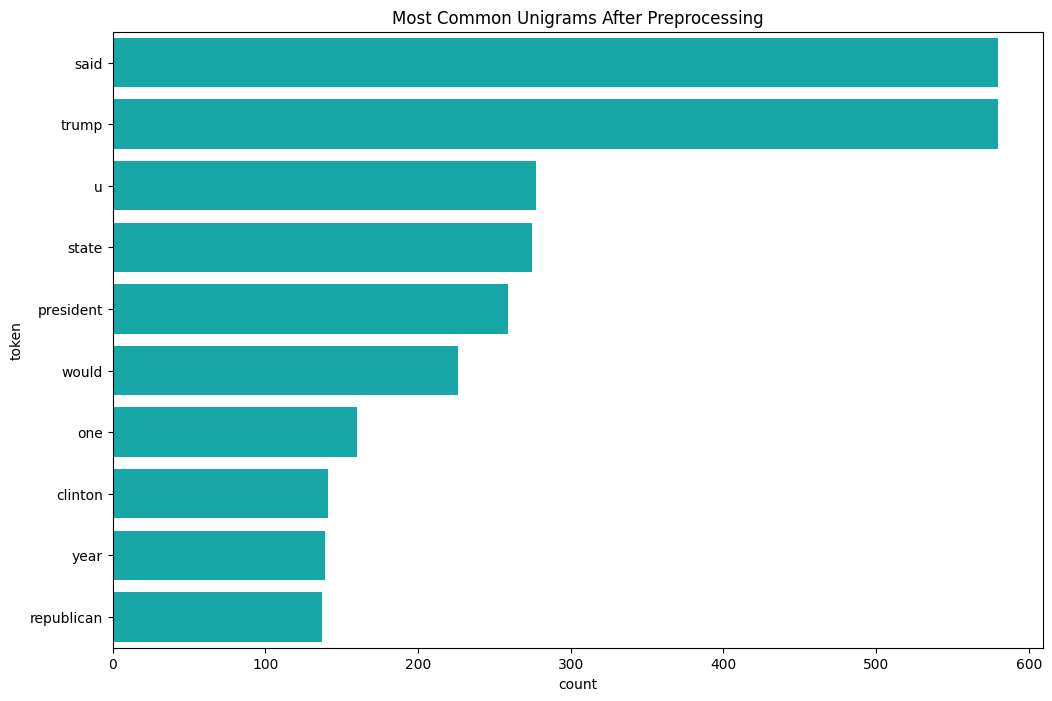

In [102]:
sns.barplot(
x = "count",
y = "token",
hue = "token",
data = unigrams,
orient = "h",
palette = [default_plot_colour]).set(title = "Most Common Unigrams After Preprocessing")

In [104]:
bigrams = (pd.Series(nltk.ngrams(clean_tokens, 2)).value_counts().reset_index()[:10])
bigrams

,index,count
0,"(donald, trump)",113
1,"(united, state)",84
2,"(white, house)",74
3,"(president, donald)",47
4,"(hillary, clinton)",39
5,"(new, york)",33
6,"(supreme, court)",30
7,"(image, via)",29
8,"(official, said)",26
9,"(trump, administration)",26


# Sentiment Analysis

In [115]:
vader_sentiment = SentimentIntensityAnalyzer()

In [116]:
data["vader_sentiment_score"]  = data["text"].apply(lambda x: vader_sentiment.polarity_scores(x)["compound"])

In [117]:
data.head()

,title,text,date,fake_or_factual,cleaned_text,vader_sentiment_score
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590


In [118]:
bins = [-1,-0.1,0.1,1]
names = ["negative","neutral", "positive"]

In [119]:
data["vader_sentiment_label"] = pd.cut(data["vader_sentiment_score"] , bins, labels = names)
data.head()

,title,text,date,fake_or_factual,cleaned_text,vader_sentiment_score,vader_sentiment_label
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660,negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,positive


<Axes: xlabel='vader_sentiment_label'>

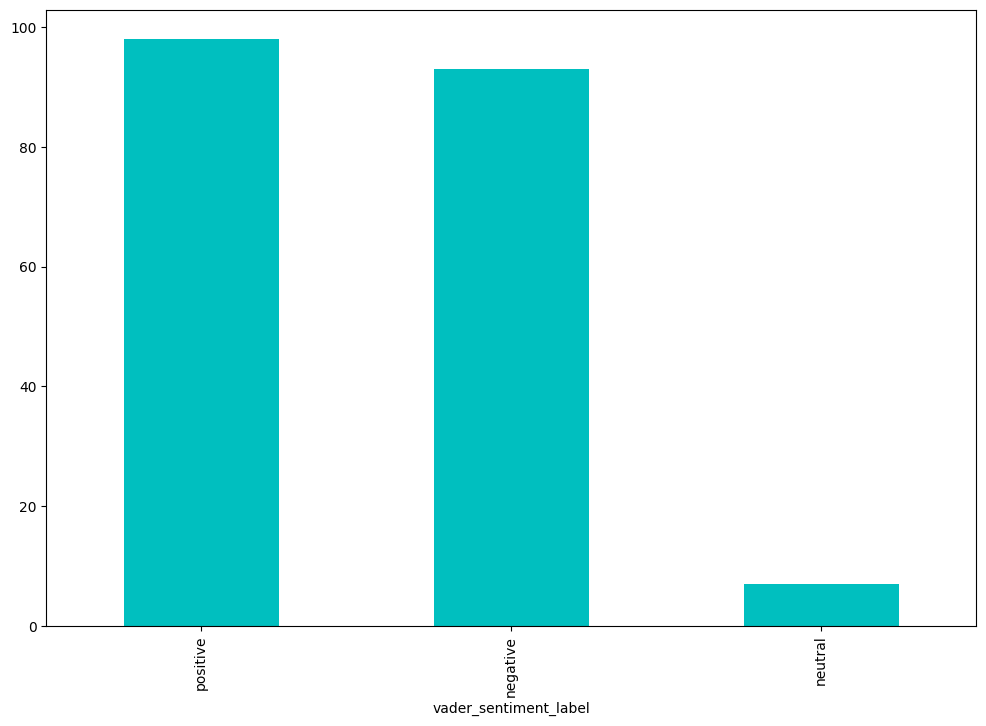

In [120]:
data["vader_sentiment_label"].value_counts().plot.bar(color = default_plot_colour)

/var/folders/h_/mrcrj4rn5j10vq8gwn_54p2w0000gn/T/ipykernel_2635/445961778.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(


[Text(0.5, 1.0, 'sentiments by News Type')]

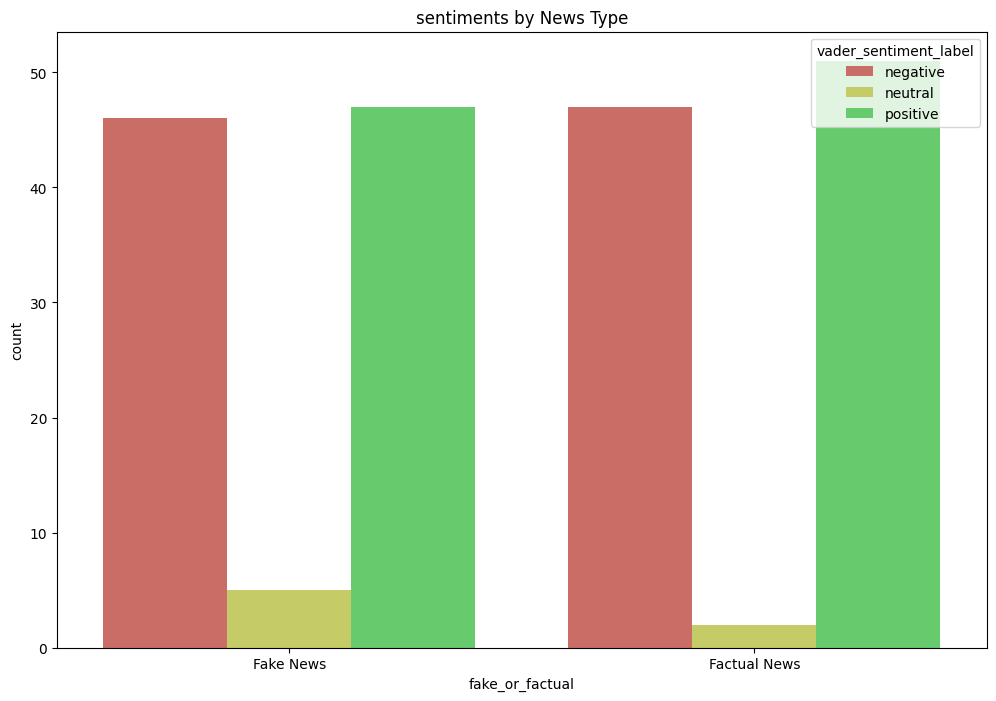

In [121]:
sns.countplot(
x = "fake_or_factual",
hue = "vader_sentiment_label",
palette = sns.color_palette("hls"),
data = data).set(title = "sentiments by News Type")

# Topic Modelling

In [122]:
fake_news_text = data[data["fake_or_factual" ] == "Fake News"]["cleaned_text"].reset_index(drop=True)

In [123]:
fake_news_text

0     [two, small, problem, analogy, susan, jesus, m...
1     [buried, trump, bonkers, interview, new, york,...
2     [woman, make, 50, percent, country, grossly, u...
3     [shame, teen, vogue, maxine, water, guest, tee...
4     [former, white, house, press, secretary, obama...
                            ...                        
93    [jon, ritzheimer, infamous, hater, muslim, one...
94    [well, take, long, look, first, beastiality, m...
95    [florida, toxic, dangerous, stand, ground, gun...
96    [politico, report, almost, neckandneck, race, ...
97    [small, obscure, community, college, disallowi...
Name: cleaned_text, Length: 98, dtype: object

In [124]:
dictionary_fake = corpora.Dictionary(fake_news_text)

In [127]:
doc_term_fake = [dictionary_fake.doc2bow(text) for text in fake_news_text]

In [128]:
doc_term_fake

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 4),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 4),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 3),
  (60, 1),
  (61, 3),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 3),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 1)

In [129]:
coherence_values = []
model_list = []
min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1 ):
    model = gensim.models.LdaModel(doc_term_fake, num_topics = num_topics_i, id2word = dictionary_fake)
    model_list.append(model)
    coherence_model = CoherenceModel(model = model, texts = fake_news_text, dictionary = dictionary_fake, coherence = "c_v")
    coherence_values.append(coherence_model.get_coherence())

In [130]:
coherence_values

[0.2872847706879873,
 0.23225523798367945,
 0.25742757559578017,
 0.2604137853293782,
 0.26376196501284116,
 0.2683992798746056,
 0.2608316625407815,
 0.26103178007386424,
 0.25990311727788307,
 0.2738445356561279]

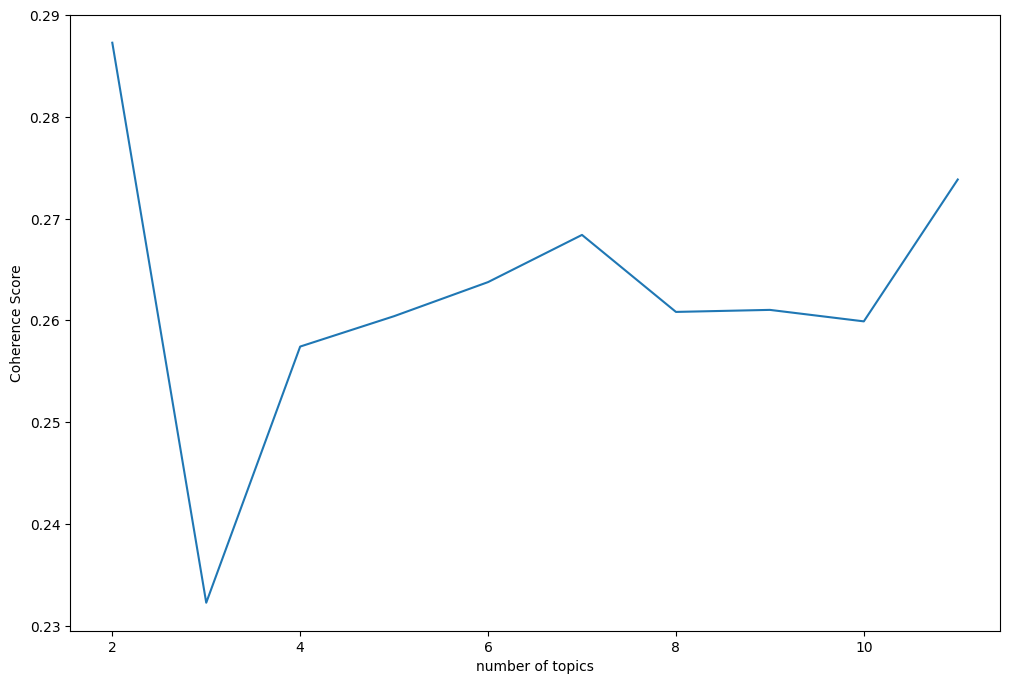

In [132]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("number of topics")
plt.ylabel("Coherence Score")
plt.show()

In [134]:
num_topics_lda = 7
lda_model = gensim.models.LdaModel(corpus = doc_term_fake, id2word = dictionary_fake, num_topics = num_topics_lda)

In [135]:
lda_model.print_topics(num_topics = num_topics_lda, num_words = 10)

[(0,
  '0.011*"trump" + 0.006*"said" + 0.006*"state" + 0.004*"president" + 0.004*"would" + 0.003*"obama" + 0.003*"u" + 0.003*"one" + 0.003*"year" + 0.003*"american"'),
 (1,
  '0.005*"said" + 0.004*"state" + 0.004*"time" + 0.004*"trump" + 0.004*"clinton" + 0.004*"president" + 0.004*"u" + 0.003*"new" + 0.003*"would" + 0.003*"mccain"'),
 (2,
  '0.013*"trump" + 0.005*"would" + 0.004*"president" + 0.004*"state" + 0.004*"said" + 0.004*"one" + 0.003*"u" + 0.003*"donald" + 0.003*"republican" + 0.003*"time"'),
 (3,
  '0.018*"trump" + 0.005*"clinton" + 0.005*"republican" + 0.004*"president" + 0.004*"said" + 0.004*"state" + 0.003*"u" + 0.003*"hillary" + 0.003*"donald" + 0.003*"people"'),
 (4,
  '0.015*"trump" + 0.006*"president" + 0.006*"clinton" + 0.004*"woman" + 0.004*"said" + 0.003*"would" + 0.003*"u" + 0.003*"hillary" + 0.003*"people" + 0.003*"know"'),
 (5,
  '0.007*"trump" + 0.006*"clinton" + 0.005*"said" + 0.004*"two" + 0.003*"donald" + 0.003*"one" + 0.003*"state" + 0.003*"president" + 0.00

In [145]:
def tfidf_corpus(doc_term_matrix):
    tfidf = TfidfModel(corpus = doc_term_matrix, normalize = True)
    corpus_tfidf = tfidf[doc_term_matrix]
    return corpus_tfidf

In [146]:
def get_coherence_scores(corpus, dictionary, text, min_topics, max_topics):
    coherence_values = []
    model_list = []
    for num_topic_i in range(min_topics, max_topics+1):
        model = LsiModel(corpus, num_topics = num_topic_i, id2word = dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model = model, texts = text, dictionary = dictionary)
        coherence_values.append(coherence_model.get_coherence())
    plt.plot(range(min_topics, max_topics+1), coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence")

In [147]:
corpus_tfidf_fake = tfidf_corpus(doc_term_fake)

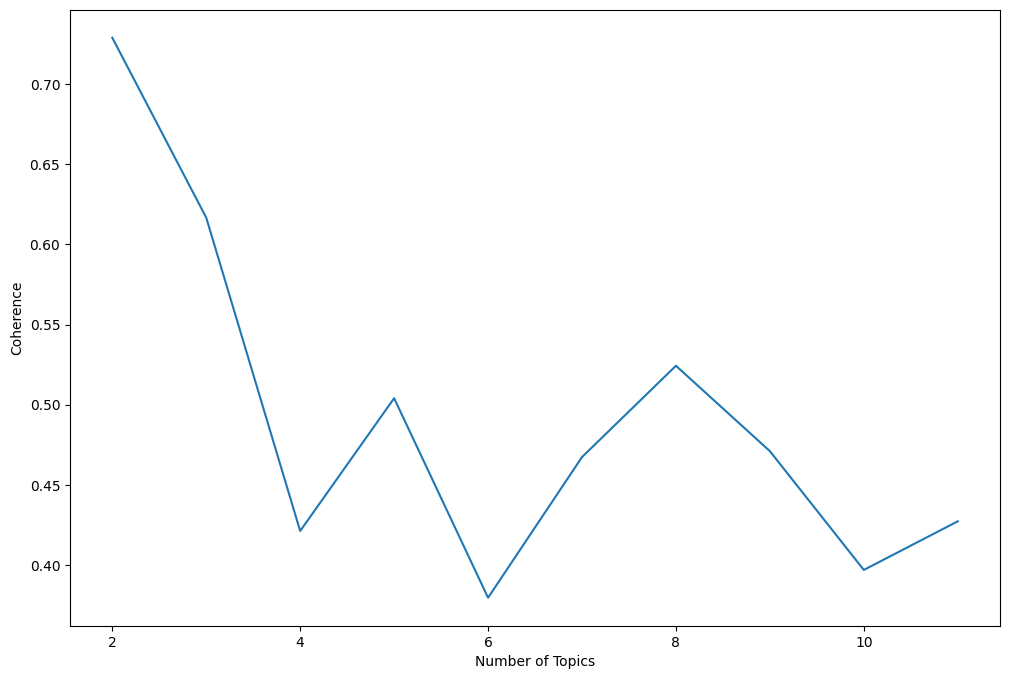

In [149]:
get_coherence_scores(corpus_tfidf_fake, dictionary_fake,fake_news_text,  min_topics = 2, max_topics=11)

In [150]:
lsi_model = LsiModel(corpus_tfidf_fake, num_topics = 7, id2word = dictionary_fake)

In [151]:
lsi_model.print_topics()

[(0,
  '0.190*"trump" + 0.136*"clinton" + 0.095*"hillary" + 0.094*"obama" + 0.089*"president" + 0.087*"woman" + 0.078*"republican" + 0.077*"party" + 0.077*"flynn" + 0.074*"candidate"'),
 (1,
  '-0.325*"boiler" + -0.284*"acr" + -0.244*"room" + -0.240*"pm" + -0.186*"broadcast" + -0.180*"radio" + -0.142*"tune" + -0.142*"animal" + -0.134*"jay" + -0.132*"episode"'),
 (2,
  '-0.623*"flynn" + -0.182*"immunity" + -0.122*"nana" + -0.116*"mr" + -0.110*"30" + -0.108*"march" + -0.102*"russian" + -0.100*"source" + 0.095*"school" + -0.092*"adviser"'),
 (3,
  '0.217*"clinton" + -0.186*"school" + -0.176*"student" + 0.141*"hillary" + -0.121*"county" + -0.121*"flynn" + 0.110*"sander" + 0.098*"debate" + 0.097*"woman" + 0.091*"nominee"'),
 (4,
  '0.200*"email" + -0.194*"trump" + 0.168*"dnc" + -0.142*"flynn" + 0.126*"clinton" + -0.112*"cruz" + 0.111*"department" + 0.110*"rich" + 0.102*"wikileaks" + 0.099*"sander"'),
 (5,
  '0.276*"student" + 0.160*"conference" + 0.160*"school" + 0.137*"trump" + -0.125*"mcc

# Creating Classification Model

In [152]:
data.head()

,title,text,date,fake_or_factual,cleaned_text,vader_sentiment_score,vader_sentiment_label
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660,negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,positive


In [154]:
X = [",".join(map(str,l)) for l in data["cleaned_text"]]

In [155]:
X

['two,small,problem,analogy,susan,jesus,muslim,joseph,traveled,bethlehem,mary,anyone,paying,attention,appear,many,female,refugee,accompanying,male,muslim,refugee,greecesusan,sarandon,spent,christmas,holiday,greek,island,lesbos,assisting,international,organization,mounting,syrian,refugee,crisis,crisis,say,recall,travail,joseph,mary,way,inn,bethlehemin,column,huffington,post,ryot,69yearold,oscarwinning,actress,described,meeting,16yearold,girl,apparently,given,birth,shortly,arriving,island,smile,approach,without,translator,conversation,basicfriendly,sarandon,wrote,experience,take,bundle,next,open,inside,perfect,rosy,newborn,actress,continuesshe,beaming,proud,young,girl,given,birth,manage,trip,sea,walking,give,birthwasn,mary,kid,joseph,took,road,far,manger,syrian,baby,room,innsarandon,short,column,part,new,collaborative,series,huffington,post,virtual,reality,network,ryot,called,crossing,see,actress,host,series,report,chronicling,refugee,crisis,unfolds,greece,actress,also,criticized,politic

In [156]:
Y = data["fake_or_factual"]

In [157]:
count_vec = CountVectorizer()

In [158]:
count_vec_fit = count_vec.fit_transform(X)

In [162]:
bag_of_words = pd.DataFrame(count_vec_fit.toarray(), columns = count_vec.get_feature_names_out())

In [164]:
bag_of_words

,01,03,05,08441,10,100,1000,10000,1000000000000000,1002,...,zimbabwean,zimdars,zimmerman,zina,zionism,zoe,zone,zoom,zouka,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, Y, test_size = 0.3)

In [210]:
lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)

In [211]:
y_pred_lr = lr.predict(X_test)

In [212]:
accuracy_score(y_pred_lr, Y_test)

0.9333333333333333

In [213]:
print(classification_report(y_pred_lr, Y_test))

              precision    recall  f1-score   support

Factual News       0.96      0.90      0.93        29
   Fake News       0.91      0.97      0.94        31

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



In [226]:
svm = SGDClassifier().fit(X_train, Y_train)

In [227]:
y_pred_svm = svm.predict(X_test)

In [228]:
accuracy_score(y_pred_svm, Y_test)

0.9

In [229]:
print(classification_report(y_pred_svm, Y_test))

              precision    recall  f1-score   support

Factual News       0.93      0.86      0.89        29
   Fake News       0.88      0.94      0.91        31

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

